In [11]:
# Imports
import PySimpleGUI as sg
import scipy.io
import os
import matplotlib.pyplot as plt
import numpy as np

We have 502 examples:  (50, 298)
Each example has 50 muscles of data:  (298,)
Max length of time in examples is 2.98 sec: (298,)
Each time step of 10ms, so 10ms * 298 = 2.98s
(4, 298)
(298, 4)


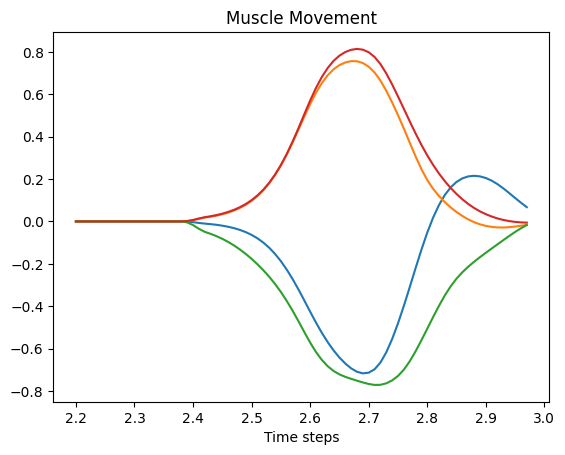

In [54]:
# Get monkey data using relative path of gui file
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
file_path = os.path.join(parent_directory, "model", "monkey_data.mat")

# Load the .mat file
mat_data = scipy.io.loadmat(file_path)

# Now you can access the variables stored in the .mat file
# For example, if you have a variable named 'data' in the .mat file:
mvm_data = mat_data['targ'][0][0]
# data = mat_data['data']
keys = mat_data.keys()

print("We have 502 examples: ", mvm_data.shape)
print("Each example has 50 muscles of data: ", mvm_data[0].shape)
print("Max length of time in examples is 2.98 sec:", mvm_data[0].shape)
print("Each time step of 10ms, so 10ms * 298 = 2.98s")

num_measurements = 298
interval_ms = 10
time_axis = np.arange(2.2, 2.98, .01)
rows = [1,7,9,12]
mvm_data = mvm_data[rows]
print(mvm_data.shape)
mvm_data = mvm_data.T
print(mvm_data.shape)
mvm_data = mvm_data[220:]

plt.plot(time_axis, mvm_data)

plt.title('Muscle Movement')
plt.xlabel('Time steps')
plt.ylabel('')
plt.show()

In [ ]:
# Get monkey data using relative path of gui file
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
file_path = os.path.join(parent_directory, "model", "monkey_data.mat")

# Load the .mat file
mat_data = scipy.io.loadmat(file_path)
mvm_data = mat_data['targ'][0]
time_axis = np.arange(2.2, 2.98, .01)
mvm_data = mvm_data[0].T
mvm_data = mvm_data[220:]

plt.plot(time_axis, mvm_data)
plt.title('Muscle Movement')
plt.xlabel('Time steps')
plt.ylabel('')
plt.show()

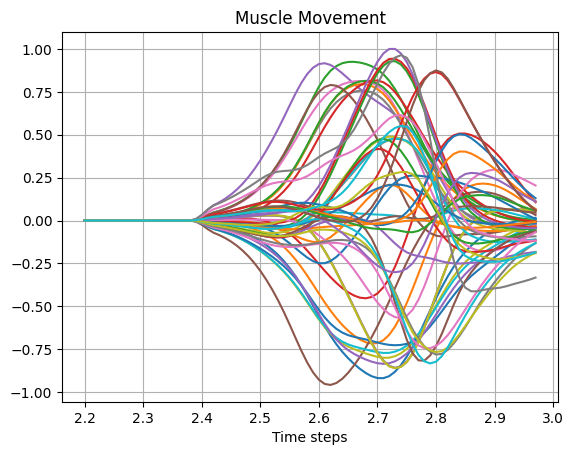

In [75]:
import PySimpleGUI as sg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Generate example data
np.random.seed(0)
num_measurements = 298
interval_ms = 10
time_axis = np.arange(0, num_measurements * interval_ms, interval_ms)
data = np.random.randn(num_measurements)

# Define the layout of the GUI
left_column = [
    [sg.Button("All Muscles")],
    [sg.Button("Single Muscles")]

]

right_column = [
    [sg.Canvas(size=(640, 480), key='-CANVAS-')],
    [sg.Slider(range=(0, 50), orientation='h', size=(100, 20), default_value=0, key='-SLIDER-')],
]

layout = [ [[sg.Text("Neuro Engineering Capstone", font='Any 20 bold')]],
    [sg.Column(left_column), sg.VSeperator(), sg.Column(right_column)]
]# Create the PySimpleGUI window
window = sg.Window('Time Series Plot', layout, finalize=True)

# Create a function to plot the data
def plot_data(muscle = None):
    fig, ax = plt.subplots()
    
    # Get monkey data using relative path of gui file
    current_directory = os.getcwd()
    parent_directory = os.path.dirname(current_directory)
    file_path = os.path.join(parent_directory, "model", "monkey_data.mat")

    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)
    mvm_data = mat_data['targ'][0][0]
    time_axis = np.arange(2.2, 2.98, .01)

    if muscle is not None:
        mvm_data = mvm_data[muscle]
    mvm_data = mvm_data.T
    mvm_data = mvm_data[220:]

    ax.plot(time_axis, mvm_data)
    ax.set_title('Muscle Movement')
    ax.set_xlabel('Time steps')
    ax.set_ylabel('')
    ax.grid(True)



    # Embed the Matplotlib plot into the PySimpleGUI window
    canvas = FigureCanvasTkAgg(fig, master=window['-CANVAS-'].TKCanvas)
    canvas.draw()
    canvas.get_tk_widget().pack(side='top', fill='both', expand=1)

# Event loop
while True:
    event, values = window.read()
    if event == sg.WINDOW_CLOSED or event == 'Exit':

        break
    elif event == 'All Muscles':
        plot_data()

    elif event == "Single M"

window.close()
